# EDA German Cars

## Analyses Core Points

- Loss in value: compare cars within a car class (e.g. small car from all makes) - yuliya
- Loss in value: compare models within 1 make - mirza
- Comparative EDA: uk vs germany - alex

# Import Tools

In [1]:
# import pandas, numpy, datetime module
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta

import datetime
import time
import re

# import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import formattings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

RSEED = 3

# Setting plt style

sns.set_style("whitegrid",
            {"grid.color": "#EBEBEB",
            "grid.linestyle": ":",
             
            'axes.facecolor': 'white',
            'axes.edgecolor': '#00135D',
             
            'text.color': '#00135D',
            'xtick.color': '#212121',
            'ytick.color': '#212121',
             
            'axes.grid': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,
             
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False
            })

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3', '#949494', '#A1A1A1', '#ADADAD', '#BABABA', '#C7C7C7', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4']
sns.set_palette(sns.color_palette(sns_colors))

In [2]:
# Import the dataset and load DF
df = pd.read_csv('../data/df_ml.csv')
df

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
0,Volkswagen,Polo GTI,34690.0,Petrol,10.0,Automatic,2023.0,152.0,1.0,Sedan,Demonstration vehicle,4.2,138.0,Gray,1.984,Front,Small car,0.0,Volkswagen Polo GTI
1,Volkswagen,Polo GTI,34950.0,Petrol,1500.0,Automatic,2023.0,152.0,1.0,Sedan,Demonstration vehicle,6.6,138.0,Black,1.998,Rear,Small car,0.0,Volkswagen Polo GTI
2,Volkswagen,Polo GTI,29990.0,Petrol,9000.0,Automatic,2023.0,152.0,1.0,Sedan,Demonstration vehicle,7.4,138.0,White,1.984,Front,Small car,0.0,Volkswagen Polo GTI
3,Volkswagen,Polo GTI,33989.0,Petrol,3511.0,Automatic,2023.0,152.0,1.0,Sedan,Demonstration vehicle,5.8,138.0,Black,1.984,Front,Small car,0.0,Volkswagen Polo GTI
4,Volkswagen,Polo GTI,37980.0,Petrol,211.0,Automatic,2023.0,152.0,1.0,Small car,Demonstration vehicle,5.7,138.0,White,1.984,Front,Small car,0.0,Volkswagen Polo GTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,BMW,i3,24500.0,Electro,41800.0,Automatic,2018.0,135.0,2.0,Small car,Used,0.0,0.0,Gray,1.499,Rear,Small car,5.0,BMW i3
9154,BMW,i3,19750.0,Electro,35846.0,Automatic,2018.0,125.0,1.0,Sedan,Used,0.0,0.0,Black,1.499,Rear,Small car,5.0,BMW i3
9155,BMW,i3,19999.0,Electro,34300.0,Automatic,2018.0,125.0,1.0,Small car,Used,0.0,0.0,Black,1.499,Rear,Small car,5.0,BMW i3
9156,BMW,i3,21999.0,Electro,46000.0,Automatic,2018.0,75.0,2.0,Small car,Used,0.0,0.0,Gray,1.499,Rear,Small car,5.0,BMW i3


In [3]:
# change date from float to date/int
df['registration'] = pd.to_datetime(df['registration'].map('{:.0f}'.format), format='%Y').dt.year

# EDA

## count plots

### Car Make Model

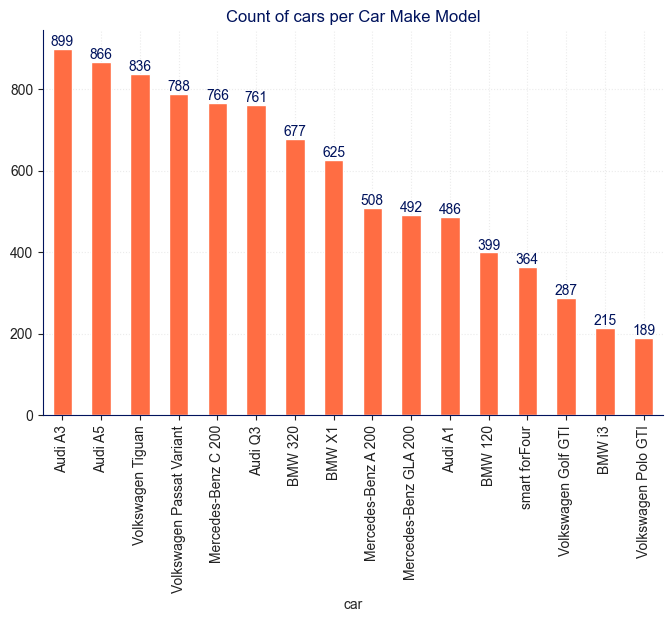

In [4]:
car_plot = df['car'].value_counts().plot(kind='bar');
plt.title('Count of cars per Car Make Model')
for container in car_plot.containers:
    car_plot.bar_label(container)

### Car Classes

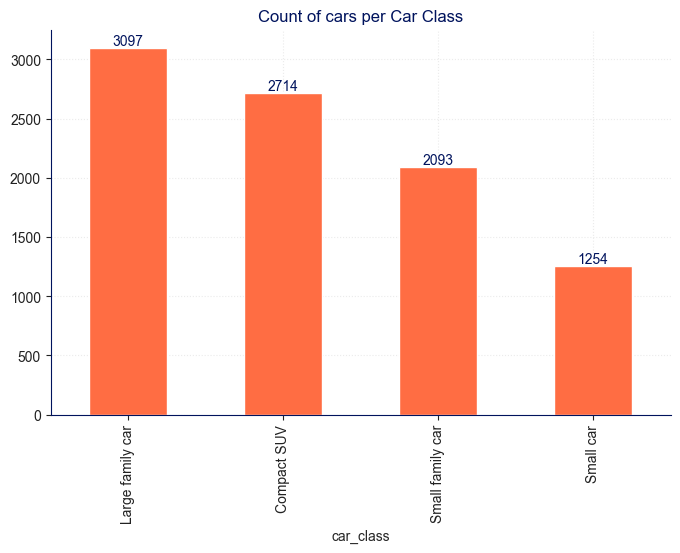

In [5]:
car_class_plot = df['car_class'].value_counts().plot(kind='bar');
plt.title('Count of cars per Car Class');
for container in car_class_plot.containers:
    car_class_plot.bar_label(container)

### Registration

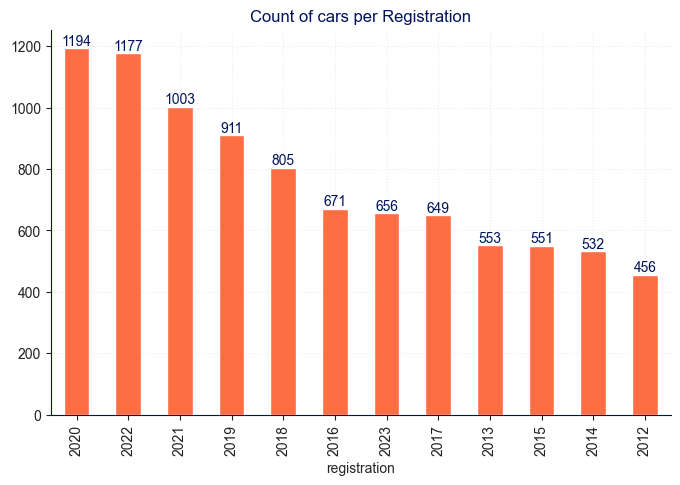

In [6]:
car_registration_plot = df['registration'].value_counts().plot(kind='bar');
plt.title('Count of cars per Registration');
for container in car_registration_plot.containers:
    car_registration_plot.bar_label(container)

In [7]:
df['car_age'].describe()

count    9158.000000
mean        4.669906
std         3.237751
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        11.000000
Name: car_age, dtype: float64

In [8]:
df['registration'].describe()

count    9158.000000
mean     2018.330094
std         3.237751
min      2012.000000
25%      2016.000000
50%      2019.000000
75%      2021.000000
max      2023.000000
Name: registration, dtype: float64

### Transmission

In [9]:
df.head(2)

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
0,Volkswagen,Polo GTI,34690.0,Petrol,10.0,Automatic,2023,152.0,1.0,Sedan,Demonstration vehicle,4.2,138.0,Gray,1.984,Front,Small car,0.0,Volkswagen Polo GTI
1,Volkswagen,Polo GTI,34950.0,Petrol,1500.0,Automatic,2023,152.0,1.0,Sedan,Demonstration vehicle,6.6,138.0,Black,1.998,Rear,Small car,0.0,Volkswagen Polo GTI


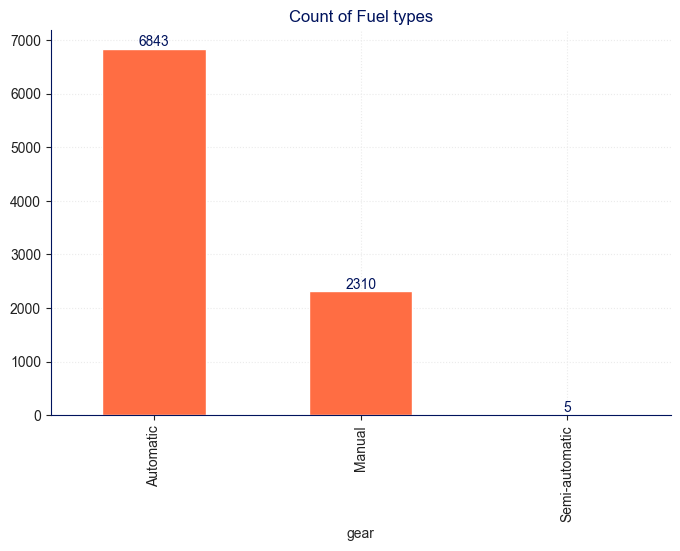

In [10]:
gear_plot = df['gear'].value_counts().plot(kind='bar');
plt.title('Count of Fuel types');
for container in gear_plot.containers:
    gear_plot.bar_label(container)

In [11]:
df['gear'].value_counts()

gear
Automatic         6843
Manual            2310
Semi-automatic       5
Name: count, dtype: int64

In [12]:
df['owner'].value_counts()

owner
1.0    5566
2.0    3168
3.0     388
4.0      36
Name: count, dtype: int64

In [13]:
df.groupby(['owner','registration']).count()['price']

owner  registration
1.0    2012              88
       2013             120
       2014             108
       2015             115
       2016             190
       2017             421
       2018             504
       2019             675
       2020             946
       2021             750
       2022            1039
       2023             610
2.0    2012             311
       2013             360
       2014             365
       2015             388
       2016             429
       2017             205
       2018             276
       2019             201
       2020             230
       2021             234
       2022             124
       2023              45
3.0    2012              47
       2013              66
       2014              55
       2015              45
       2016              49
       2017              22
       2018              25
       2019              29
       2020              17
       2021              18
       2022              14


### Fuel types

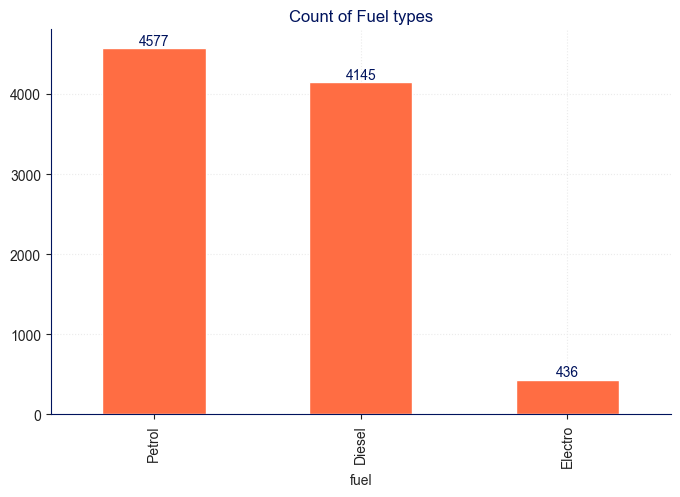

In [14]:
fuel_plot = df['fuel'].value_counts().plot(kind='bar');
plt.title('Count of Fuel types');
for container in fuel_plot.containers:
    fuel_plot.bar_label(container)

In [15]:
df['fuel'].value_counts()

fuel
Petrol     4577
Diesel     4145
Electro     436
Name: count, dtype: int64

In [16]:
df['drive_type'].value_counts()

drive_type
Front       4238
Four.w.d    3170
Rear        1750
Name: count, dtype: int64

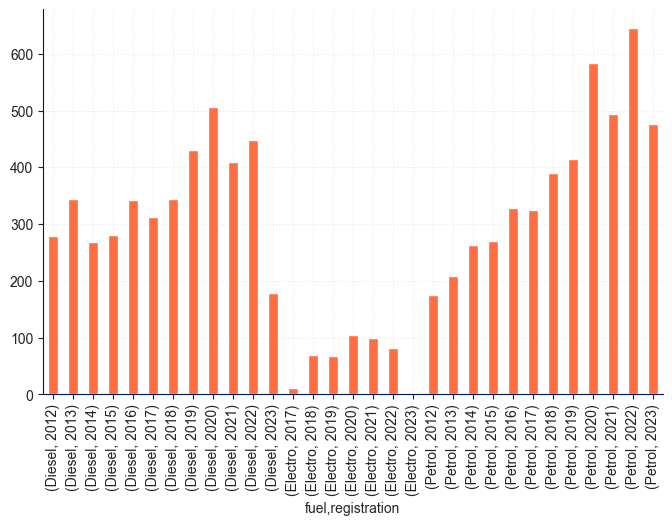

In [17]:
df.groupby(['fuel','registration']).count()['price'].plot(kind='bar');


## Counts grouped

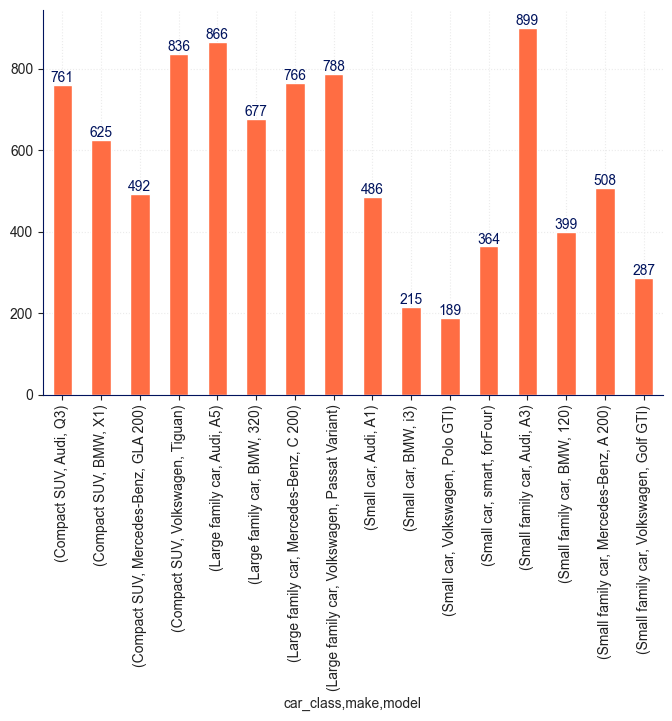

In [18]:
make_model = df.groupby(['car_class', 'make', 'model']).count()['price'].plot(kind='bar');
for container in make_model.containers:
    make_model.bar_label(container)

## Hist / Pairplots

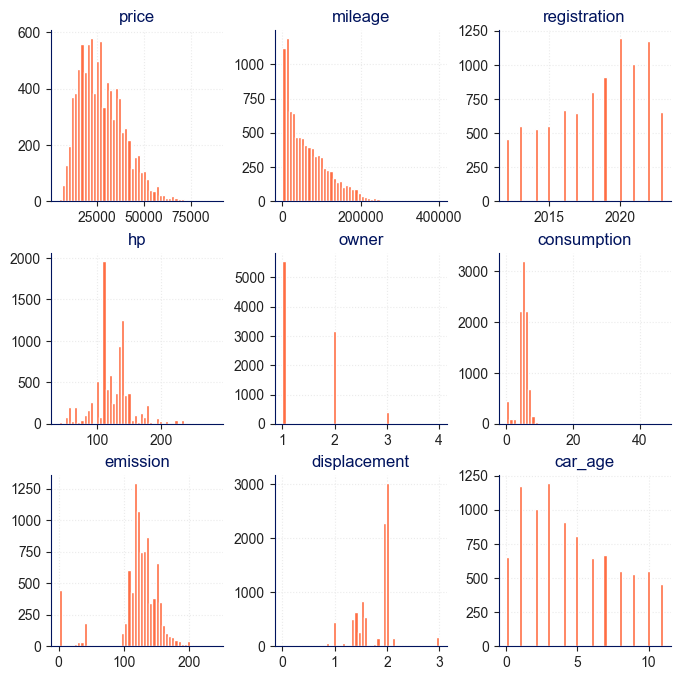

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax, bins=50);

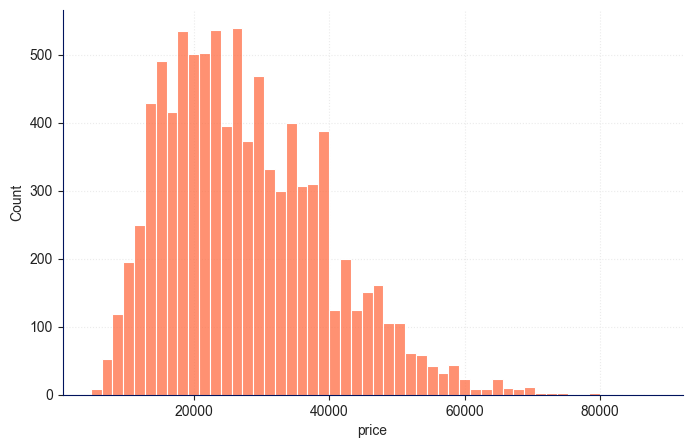

In [20]:
sns.histplot(df['price']);

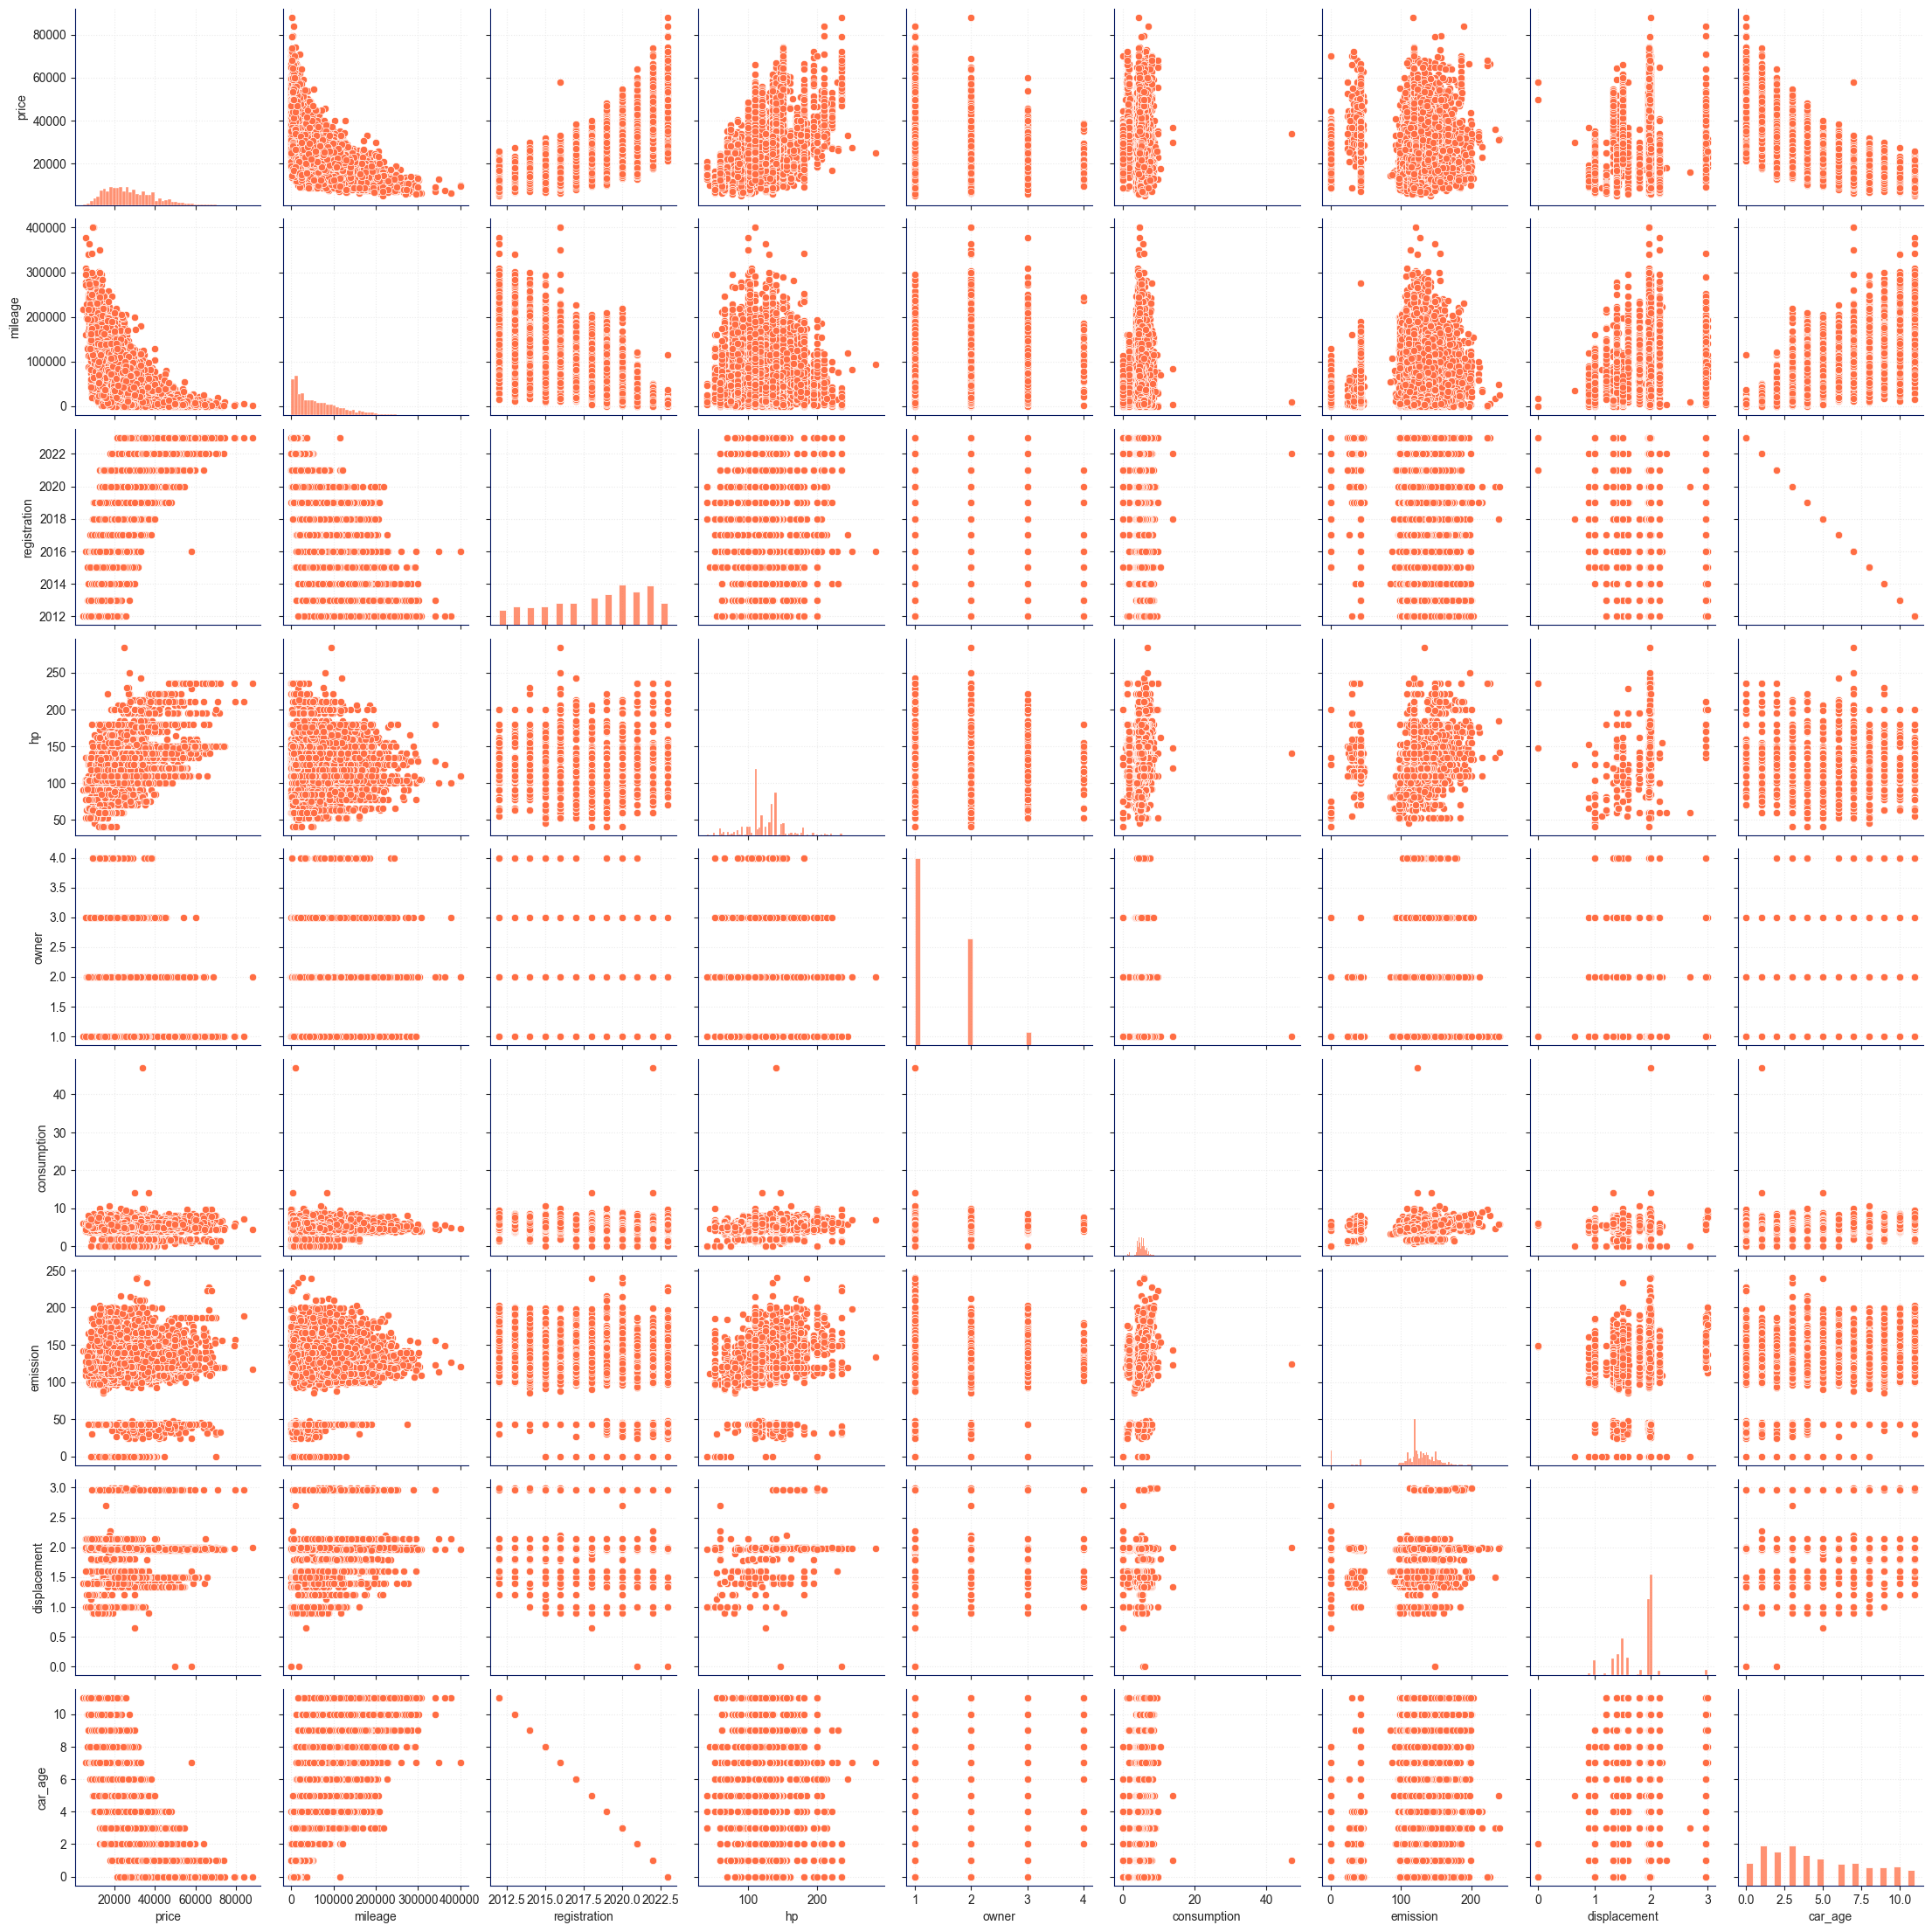

In [21]:
sns.pairplot(df);

## Hist reg vs. price

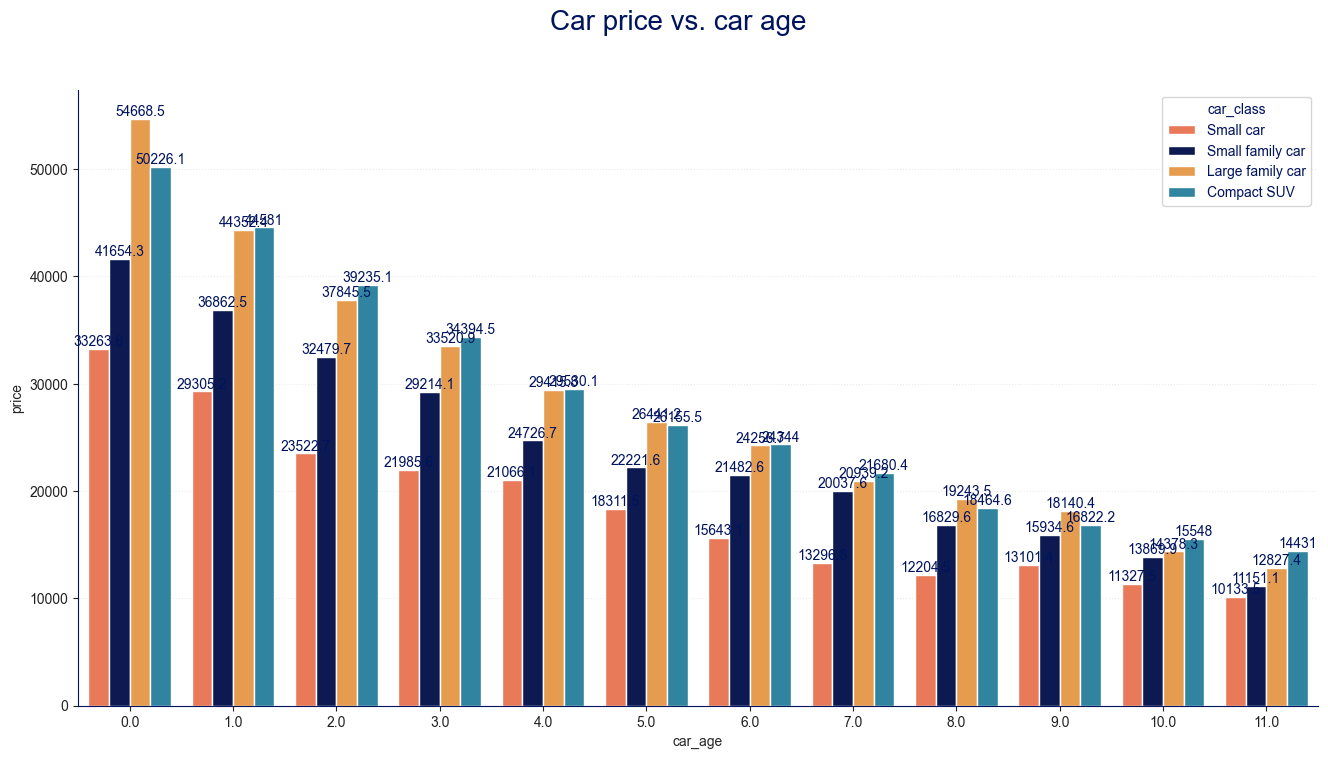

In [22]:
plt.figure(figsize=(16,8))
plt.suptitle('Car price vs. car age', fontsize=20) # add a super title to the container

age_price_plot = sns.barplot(x="car_age", y="price",  data=df, hue="car_class", ci= None);

for container in age_price_plot.containers:
    age_price_plot.bar_label(container)

# Price ranges

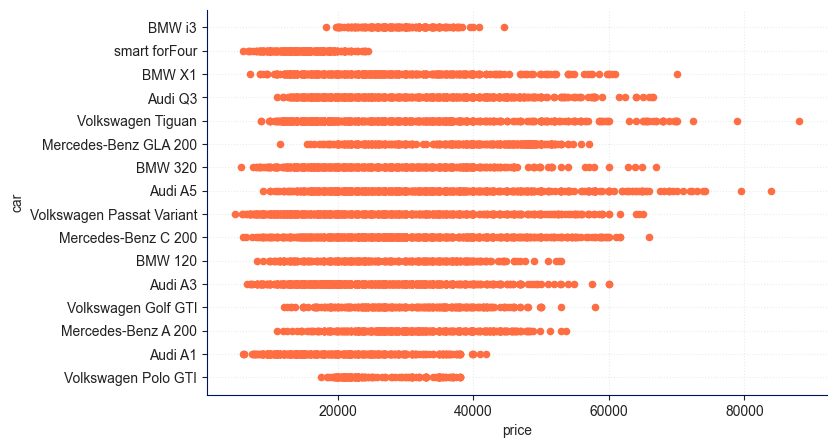

In [23]:
df.plot(kind='scatter', x='price', y='car');

# group year/ avg price + loss

In [24]:
# aggregate cars, makes and model on avg price per year / model

df_grouped = df.groupby(['car_class', 'car', 'registration', 'car_age'])['price'].mean().round(2).reset_index()
df_grouped['loss'] = df_grouped['price']

In [25]:
# split DF to individual makes, to calculate loss

# function to split the DF
def split_all_cars(df, car):
    return df_grouped[df_grouped['car'] == car].sort_values(['registration'], ascending = False)

# list of cars models
cars_name = ['Audi Q3', 'BMW X1', 'Mercedes-Benz GLA 200', 'Volkswagen Tiguan',
       'Audi A5', 'BMW 320', 'Mercedes-Benz C 200',
       'Volkswagen Passat Variant', 'Audi A1', 'BMW i3',
       'Volkswagen Polo GTI', 'smart forFour', 'Audi A3', 'BMW 120',
       'Mercedes-Benz A 200', 'Volkswagen Golf GTI']

# append Dfs with each car into a dictionary
dfs = {car: split_all_cars(df, car) for car in cars_name}

# iterate over Dfs in teh dictionary and calculate loss in %
for key, data in dfs.items():
    data['loss'] = ((1-(data['loss'])/data['price'].max())*100).round(2)

In [26]:
df_loss = pd.concat(dfs.values(), ignore_index=True)

In [27]:
df_loss

,car_class,car,registration,car_age,price,loss
0,Compact SUV,Audi Q3,2023,0.0,48944.91,0.00
1,Compact SUV,Audi Q3,2022,1.0,44400.97,9.28
2,Compact SUV,Audi Q3,2021,2.0,40915.81,16.40
3,Compact SUV,Audi Q3,2020,3.0,37057.65,24.29
4,Compact SUV,Audi Q3,2019,4.0,32900.94,32.78
...,...,...,...,...,...,...
168,Small family car,Volkswagen Golf GTI,2016,7.0,24029.65,45.71
169,Small family car,Volkswagen Golf GTI,2015,8.0,19581.64,55.76
170,Small family car,Volkswagen Golf GTI,2014,9.0,18883.06,57.33
171,Small family car,Volkswagen Golf GTI,2013,10.0,15433.33,65.13


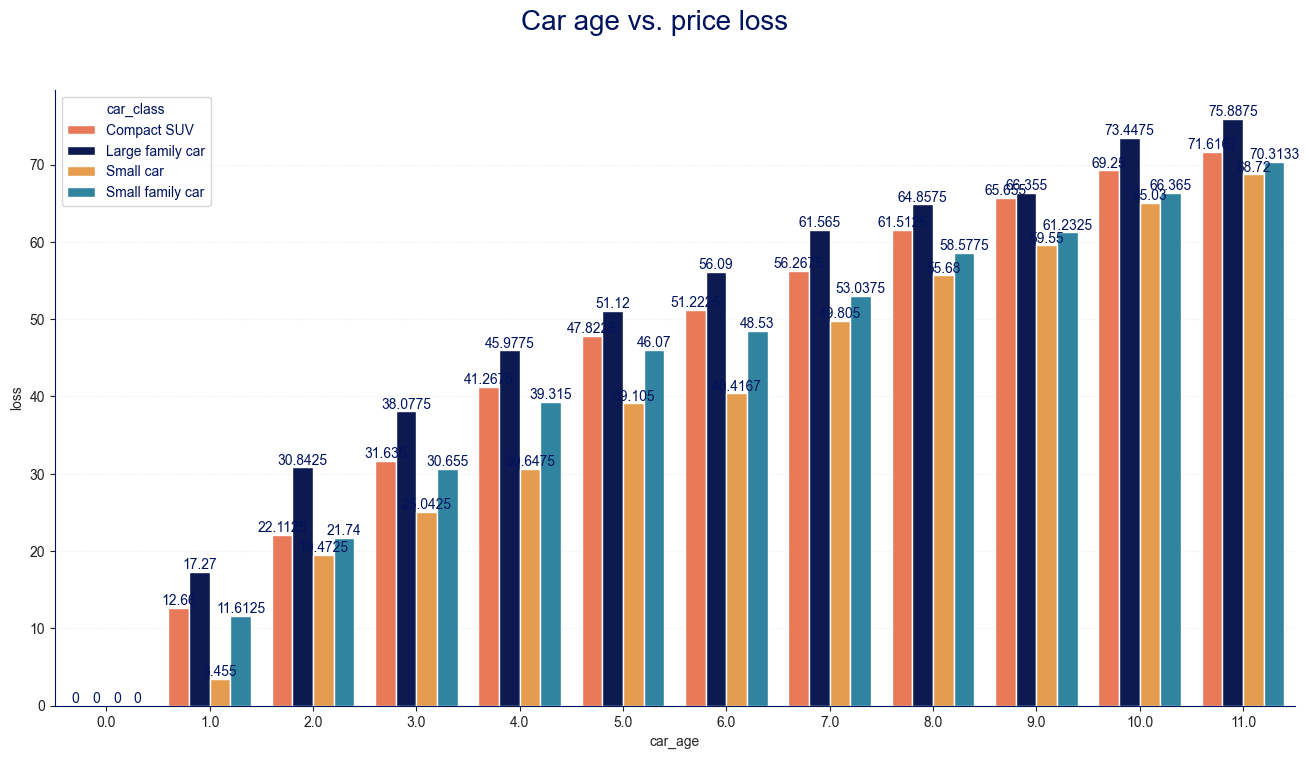

In [28]:
plt.figure(figsize=(16,8))
plt.suptitle('Car age vs. price loss', fontsize=20) # add a super title to the container

age_loss_plot = sns.barplot(x="car_age", y="loss",  data=df_loss, hue="car_class", ci= None);

for container in age_loss_plot.containers:
    age_loss_plot.bar_label(container)

# group loss per class

In [29]:
# function for splitting df into DFs per class
def split_all_classes(df, car_class):
    return df_loss[df_loss['car_class'] == car_class]

# assign keys/names for Dfs in teh dictionary
classes_name = ['Small car', 'Small family car', 'Large family car', 'Compact SUV']
dfs = {car_class: split_all_classes(df, car_class) for car_class in classes_name}

# acces Dfs as class name for later EDA
smallCar = dfs['Small car']
smallFamCar = dfs['Small family car']
largeFamCar = dfs['Large family car']
compactSUV = dfs['Compact SUV']

In [30]:
# List of df classes
df_classes = [smallCar, smallFamCar, largeFamCar, compactSUV]

# print shape of each Df
for item in df_classes:
    print(item.shape[0])

32
47
48
46


# Plots

## car_age vs. price

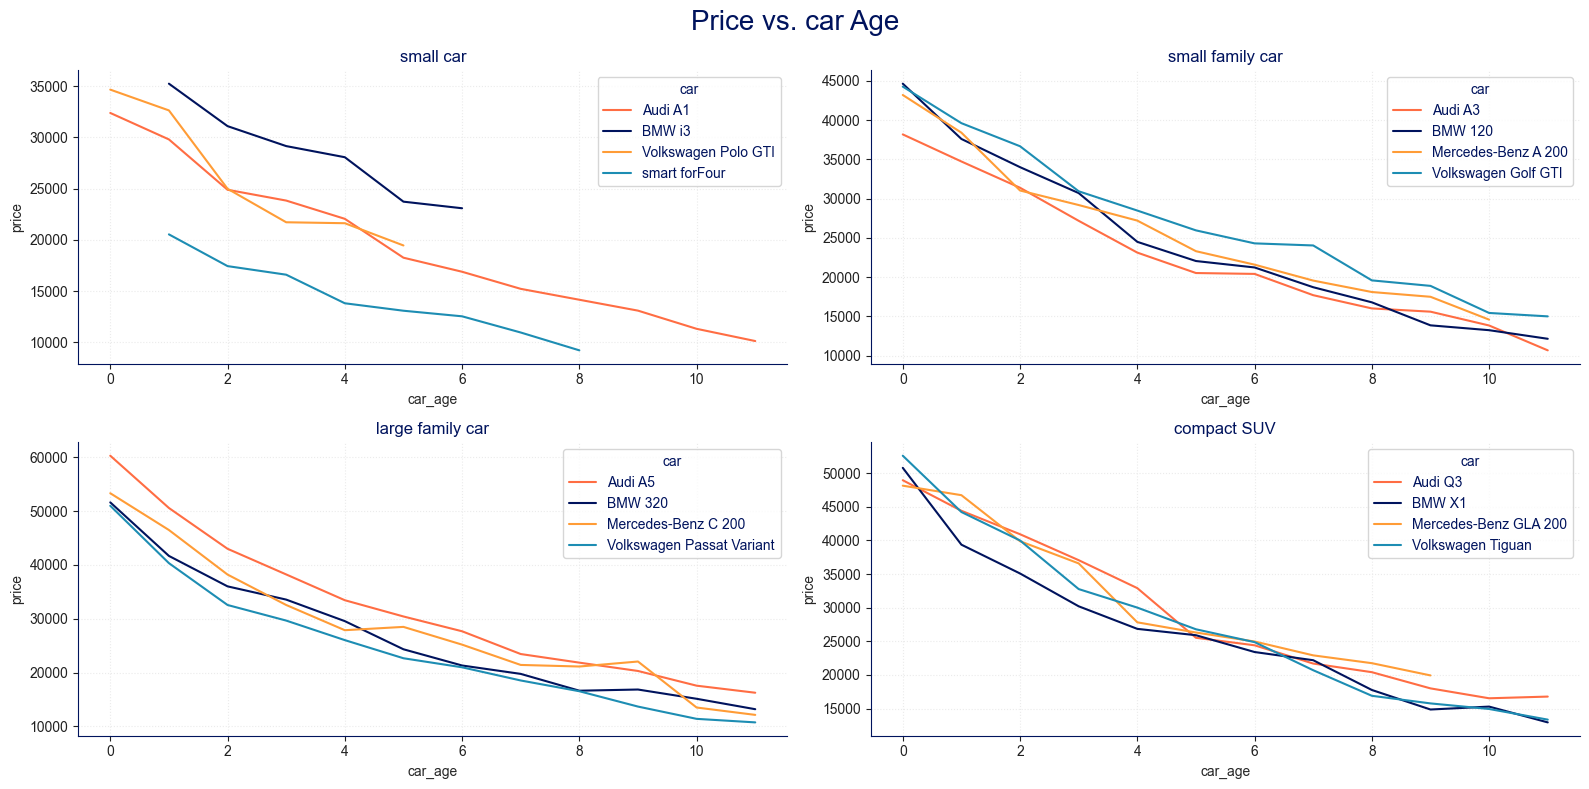

In [31]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. car Age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="price",  data=smallCar, hue="car");
plt.title('small car')

plt.subplot(2, 2, 2)  
sns.lineplot(x="car_age", y="price",  data=smallFamCar, hue="car");
plt.title('small family car')

plt.subplot(2, 2, 3)  
sns.lineplot(x="car_age", y="price",  data=largeFamCar, hue="car");
plt.title('large family car')

plt.subplot(2, 2, 4)
sns.lineplot(x="car_age", y="price",  data=compactSUV, hue="car");
plt.title('compact SUV');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

## car_age vs. loss

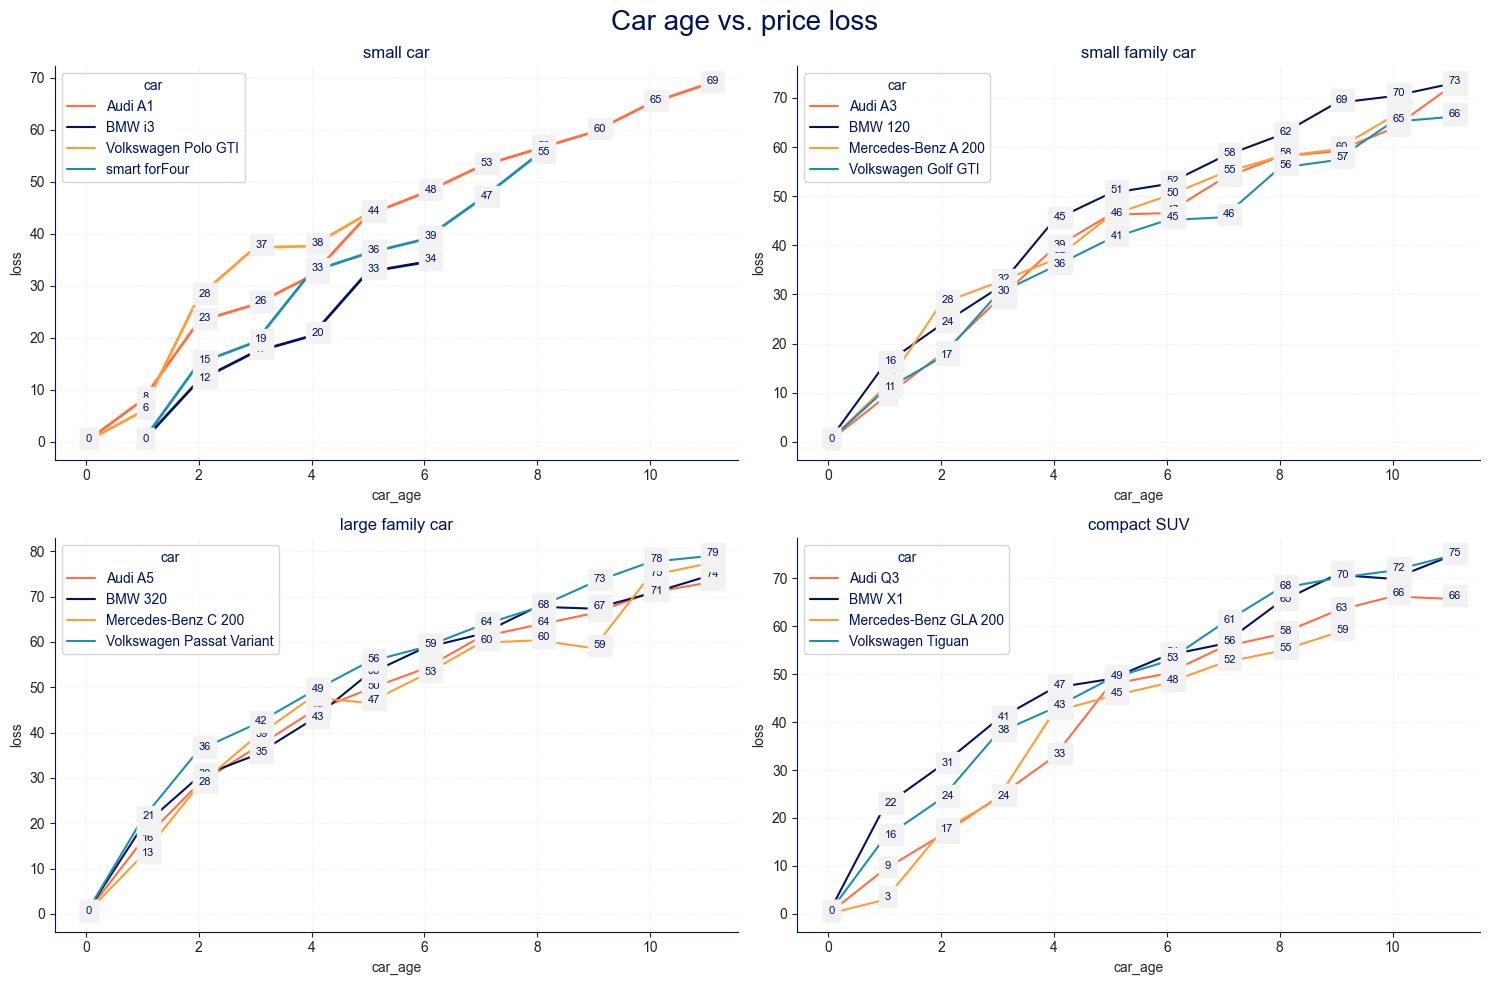

In [32]:
plt.figure(figsize=(15,10))
plt.suptitle('Car age vs. price loss', fontsize=20) 

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="loss",  data=smallCar, hue="car", marker='o', linewidth=2);
for x, y in zip(smallCar['car_age'], smallCar['loss']):
     plt.text(x = x, y = y, s = '{:.0f}'.format(y), size=8).set_backgroundcolor('#f2f2f2')
plt.title('small car')

plt.subplot(2, 2, 2)  
sns.lineplot(x="car_age", y="loss",  data=smallFamCar, hue="car", marker='o');
for x, y in zip(smallFamCar['car_age'], smallFamCar['loss']):
     plt.text(x = x, y = y, s = '{:.0f}'.format(y), size=8).set_backgroundcolor('#f2f2f2')
plt.title('small family car')

plt.subplot(2, 2, 3)  
sns.lineplot(x="car_age", y="loss",  data=largeFamCar, hue="car", marker='o');
for x, y in zip(largeFamCar['car_age'], largeFamCar['loss']):
     plt.text(x = x, y = y, s = '{:.0f}'.format(y), size=8).set_backgroundcolor('#f2f2f2')
plt.title('large family car')

plt.subplot(2, 2, 4)
sns.lineplot(x="car_age", y="loss",  data=compactSUV, hue="car", marker='o');
for x, y in zip(compactSUV['car_age'], compactSUV['loss']):
     plt.text(x = x, y = y, s = '{:.0f}'.format(y), size=8).set_backgroundcolor('#f2f2f2')
plt.title('compact SUV');

plt.subplots_adjust(top=0.85)
plt.tight_layout();

## Max. loss

In [33]:
df_loss.groupby(['car_class', 'car'])['loss'].max().reset_index()

,car_class,car,loss
0,Compact SUV,Audi Q3,66.24
1,Compact SUV,BMW X1,74.52
2,Compact SUV,Mercedes-Benz GLA 200,58.61
3,Compact SUV,Volkswagen Tiguan,74.61
4,Large family car,Audi A5,73.02
5,Large family car,BMW 320,74.42
6,Large family car,Mercedes-Benz C 200,77.21
7,Large family car,Volkswagen Passat Variant,78.90
8,Small car,Audi A1,68.72
9,Small car,BMW i3,34.49


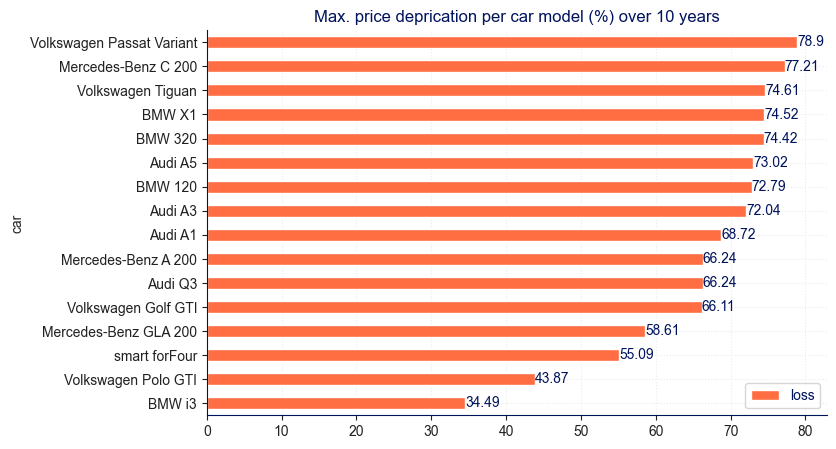

In [34]:
loss_max = df_loss.groupby(["car_class", 'car']).max()['loss'].reset_index()
loss_max.sort_values('loss', ascending=True, inplace=True)
los_m_plt = loss_max.plot(kind='barh', x='car', y='loss');
for container in los_m_plt.containers:
    los_m_plt.bar_label(container)
plt.title('Max. price deprication per car model (%) over 10 years');

## barchart MAX price

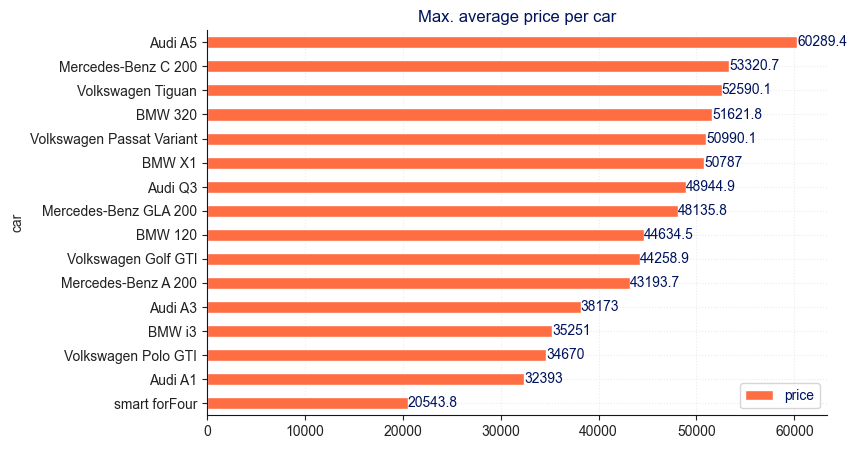

In [35]:
df_prices_max = df_loss.groupby(["car_class", 'car']).max()['price'].reset_index()
df_prices_max.sort_values('price', ascending=True, inplace=True)
max_price_plot = df_prices_max.plot(kind='barh', x='car', y='price');
for container in max_price_plot.containers:
    max_price_plot.bar_label(container)
plt.title('Max. average price per car');

## 0-5 and 6-11

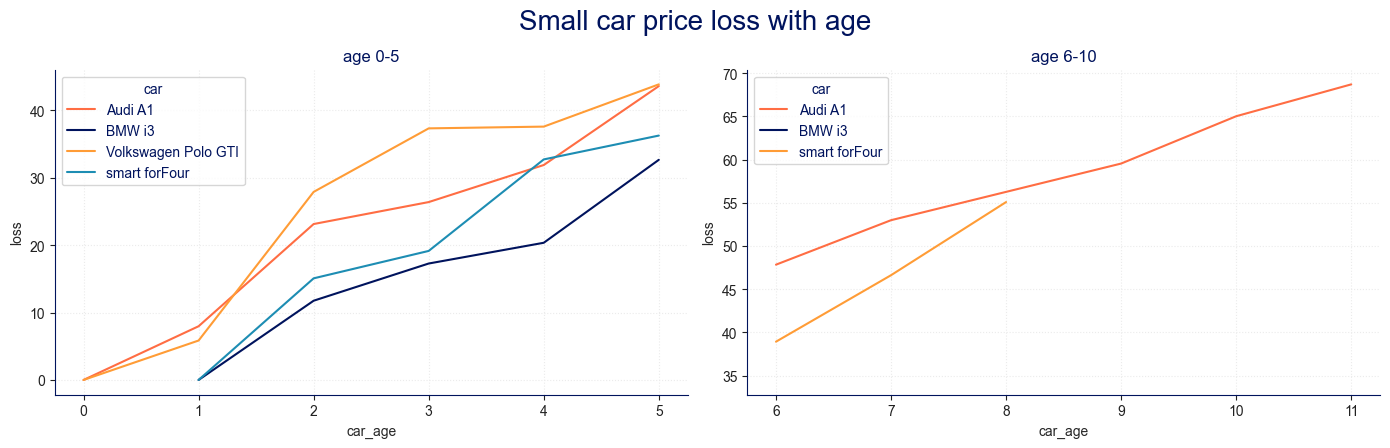

In [36]:
plt.figure(figsize=(14,8))
plt.suptitle('Small car price loss with age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="loss",  data=smallCar.query('car_age <6'), hue="car")

plt.title('age 0-5')
#plt.text(2, 5, "annotated static text") 


plt.subplot(2, 2, 2)
sns.lineplot(x="car_age", y="loss",  data=smallCar.query('car_age >=6'), hue="car")
        
plt.title('age 6-10');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

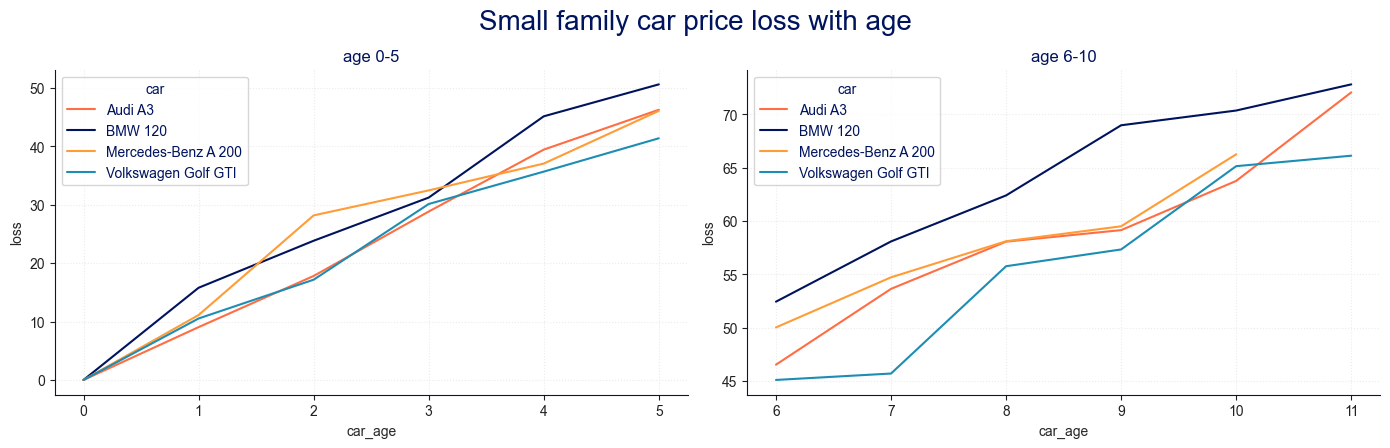

In [37]:
plt.figure(figsize=(14,8))
plt.suptitle('Small family car price loss with age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="loss",  data=smallFamCar.query('car_age <6'), hue="car");
plt.title('age 0-5')

plt.subplot(2, 2, 2)
sns.lineplot(x="car_age", y="loss",  data=smallFamCar.query('car_age >=6'), hue="car");
plt.title('age 6-10');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

In [38]:
df_explore = df_loss.copy()
df_explore

,car_class,car,registration,car_age,price,loss
0,Compact SUV,Audi Q3,2023,0.0,48944.91,0.00
1,Compact SUV,Audi Q3,2022,1.0,44400.97,9.28
2,Compact SUV,Audi Q3,2021,2.0,40915.81,16.40
3,Compact SUV,Audi Q3,2020,3.0,37057.65,24.29
4,Compact SUV,Audi Q3,2019,4.0,32900.94,32.78
...,...,...,...,...,...,...
168,Small family car,Volkswagen Golf GTI,2016,7.0,24029.65,45.71
169,Small family car,Volkswagen Golf GTI,2015,8.0,19581.64,55.76
170,Small family car,Volkswagen Golf GTI,2014,9.0,18883.06,57.33
171,Small family car,Volkswagen Golf GTI,2013,10.0,15433.33,65.13


In [39]:
df_explore.rename(columns={'Car claa': 'Car category', 'car': 'Car Model', 'First registration, year': 'First registration', 'car_age': 'Car age', 'price': 'Average price, €', 'loss': 'Estimated value loss, %'}, inplace=True)

In [40]:
#df_explore.to_csv('df_explore.csv', index=False)